In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('27_April.csv')
df

,Name of State / UT,Total Confirmed cases (Including 111 foreign Nationals),Cured/Discharged/Migrated,Death
0,Andaman and Nicobar Islands,33,11,0
1,Andhra Pradesh,1177,235,31
2,Arunachal Pradesh,1,1,0
3,Assam,36,27,1
4,Bihar,277,56,2
5,Chandigarh,30,17,0
6,Chhattisgarh,37,32,0
7,Delhi,2918,877,54
8,Goa,7,7,0
9,Gujarat,3301,313,151


In [3]:
df1= df.rename(columns={
                         'Total Confirmed cases (Including 111 foreign Nationals)':'Total',
                         'Cured/Discharged/Migrated':'cured'})

In [4]:
df1

,Name of State / UT,Total,cured,Death
0,Andaman and Nicobar Islands,33,11,0
1,Andhra Pradesh,1177,235,31
2,Arunachal Pradesh,1,1,0
3,Assam,36,27,1
4,Bihar,277,56,2
5,Chandigarh,30,17,0
6,Chhattisgarh,37,32,0
7,Delhi,2918,877,54
8,Goa,7,7,0
9,Gujarat,3301,313,151


In [5]:
df1.style.background_gradient(cmap='Reds')

,Name of State / UT,Total,cured,Death
0,Andaman and Nicobar Islands,33,11,0
1,Andhra Pradesh,1177,235,31
2,Arunachal Pradesh,1,1,0
3,Assam,36,27,1
4,Bihar,277,56,2
5,Chandigarh,30,17,0
6,Chhattisgarh,37,32,0
7,Delhi,2918,877,54
8,Goa,7,7,0
9,Gujarat,3301,313,151


In [7]:
df1['Total Active'] = df1['Total'] - (df1['Death'] + df1['cured'])
total_active = df1['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df1.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 20912


,Total Active
Name of State / UT,
Maharashtra,6538
Gujarat,2837
Delhi,1987
Madhya Pradesh,1760
Rajasthan,1626
Uttar Pradesh,1589
Andhra Pradesh,911
Tamil Nadu,841
Telengana,696


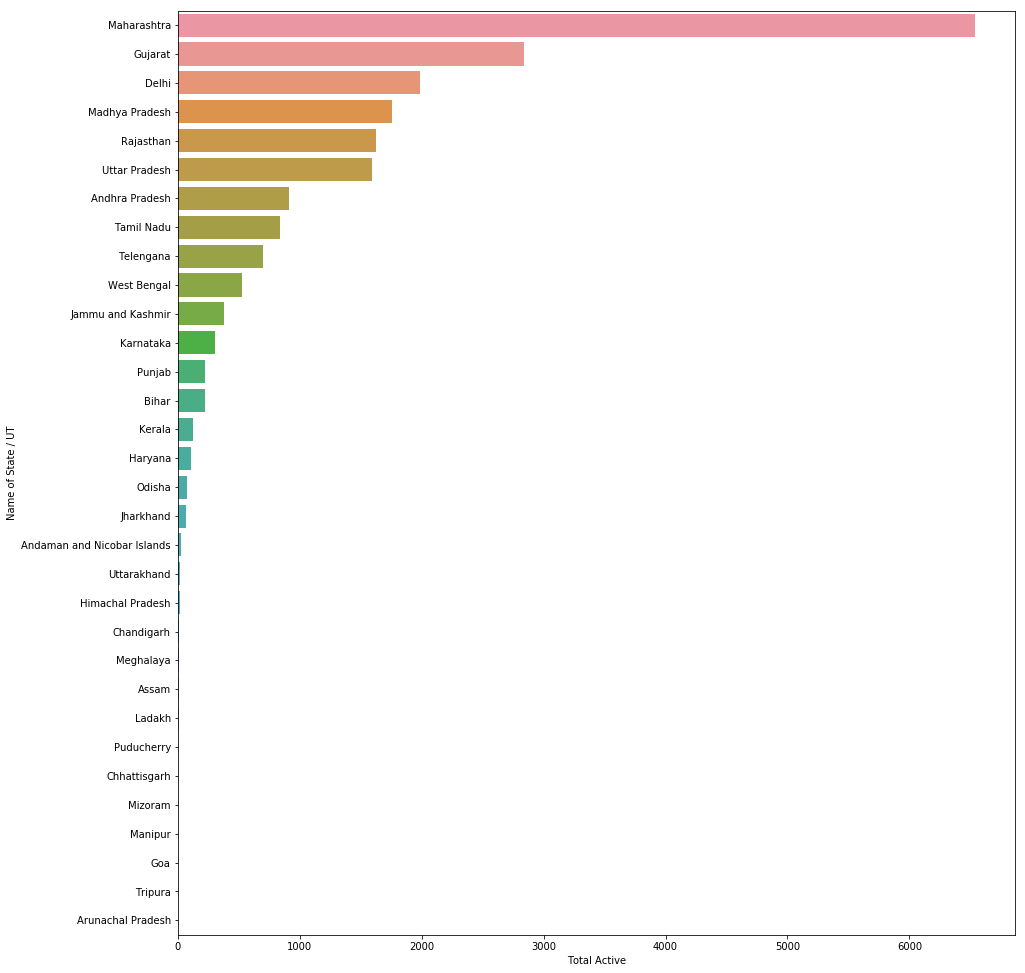

In [9]:
data = df1[['Name of State / UT','Total Active']]
plt.figure(figsize=(15,17))
data.sort_values('Total Active',ascending=False,inplace=True)
sns.barplot(y='Name of State / UT',x='Total Active',data=data)

In [10]:
df1

,Name of State / UT,Total,cured,Death,Total Active
0,Andaman and Nicobar Islands,33,11,0,22
1,Andhra Pradesh,1177,235,31,911
2,Arunachal Pradesh,1,1,0,0
3,Assam,36,27,1,8
4,Bihar,277,56,2,219
5,Chandigarh,30,17,0,13
6,Chhattisgarh,37,32,0,5
7,Delhi,2918,877,54,1987
8,Goa,7,7,0,0
9,Gujarat,3301,313,151,2837


In [11]:
India_coord = pd.read_excel('Indian Coordinates.xlsx')


In [12]:
df2 = pd.merge(India_coord,df,on='Name of State / UT')
df2

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Including 111 foreign Nationals),Cured/Discharged/Migrated,Death
0,Andhra Pradesh,14.750429,78.570026,1177,235,31
1,Delhi,28.669993,77.230004,2918,877,54
2,Haryana,28.450006,77.019991,289,176,3
3,Karnataka,12.570381,76.919997,511,188,20
4,Kerala,8.900373,76.569993,469,342,4
5,Maharashtra,19.250232,73.160175,8068,1188,342
6,Punjab,31.519974,75.980003,313,71,18
7,Rajasthan,26.449999,74.639981,2185,518,41
8,Telengana,18.112400,79.019300,1002,280,26
9,Uttar Pradesh,27.599981,78.050006,1955,335,31


In [13]:
df2.shape

(11, 6)

In [18]:
map = folium.Map(location=[20, 70], zoom_start=2,tiles='Stamenterrain')

for lat, lon, value, name in zip(df2['Latitude'], df2['Longitude'], df2['Total Confirmed cases (Including 111 foreign Nationals)'], df2['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.2, popup = ('<strong>Name State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total</strong>: ' + str(value) + '<br>'),color='red',fill_opacity=0.3 ).add_to(map)
map